In [4]:
import numpy as np
import matplotlib.pyplot as plt
import process_for_daugman as pfd
from skimage.exposure import histogram
from matplotlib.pyplot import bar
from log_gabor import normalization_to_template
from hamming_distance import HammingDist
import cv2


In [5]:

#*************************************SHOW Histo*****************************************#
def showHist(img):
    # An "np.int64erface" to matplotlib.axes.Axes.hist() method
    plt.figure()
    imgHist = histogram(img, nbins=256)
    
    bar(imgHist[1].astype(np.uint8), imgHist[0], width=0.8, align='center')
#******************************************************************************#



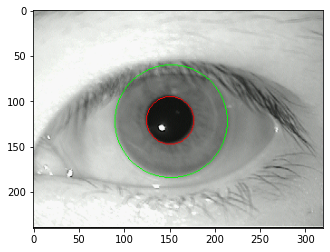

c:\Users\hazem\Desktop\imgProject\code\Iris-Recoginition-System\log_gabor.py:22: RuntimeWarning: divide by zero encountered in log
  filter[0 : int(col/2) + 1] = np.exp((-(np.log(radius/fo))**2) / (2 * np.log(sigma)**2))


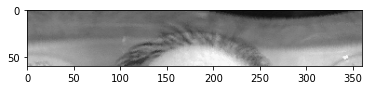

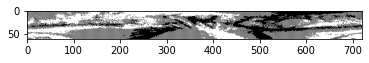

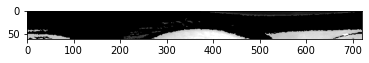

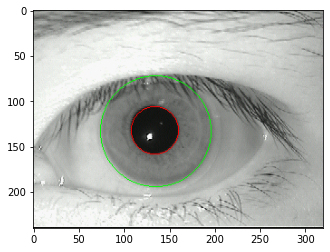

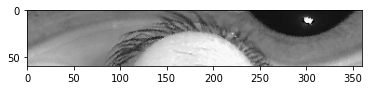

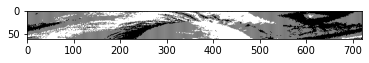

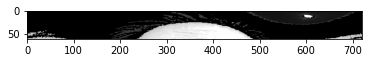

0.37819808507298697


In [3]:

#*********************************Normalization********************************************#
def normalize(image, height, width, r_in, r_out):
    thetas = np.arange(0, 2 * np.pi, 2 * np.pi / width)  # Theta values
    # print(thetas)
    r_out = r_in + r_out
    # Create empty flatten image
    flat = np.zeros((height, width, 3), np.uint8)
    noise = np.zeros((height, width, 3), np.uint8)
    # noise = n
    circle_x = int(image.shape[0] / 2)
    circle_y = int(image.shape[1] / 2)

    for i in range(width):
        for j in range(height):
            theta = thetas[i]  # value of theta coordinate
            r_pro = j / height  # value of r coordinate(normalized)

            # get coordinate of boundaries
            Xi = circle_x + r_in * np.cos(theta)
            Yi = circle_y + r_in * np.sin(theta)
            Xo = circle_x + r_out * np.cos(theta)
            Yo = circle_y + r_out * np.sin(theta)

            # the matched cartesian coordinates for the polar coordinates
            Xc = (1 - r_pro) * Xi + r_pro * Xo
            Yc = (1 - r_pro) * Yi + r_pro * Yo

            color = image[int(Xc)][int(Yc)]  # color of the pixel
             
    
            if color[0]<80 or color[0]>180 :
                noise[j][i] = color
            
            flat[j][i] = color


            # image_nor[image_nor<=80]=140
            # image_nor[ image_nor >180]=140

    return flat,noise
#******************************************************************************************#


#************************************Read first img******************************************#
IMG_PATH = 'images/kelvinl1.bmp'
img = cv2.imread(IMG_PATH, 0)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
o_circles, inner_circles,imgwithnoise = pfd.process_for_daugman(pfd,IMG_PATH)
inner_radius=inner_circles[0][2], 
outer_radius=o_circles[0][2]
iris_height=outer_radius-inner_radius
iris_height=iris_height[0].astype(int)
inner_radius= inner_radius[0]
polar_arr,noise=normalize(cimg,60,360,inner_radius,outer_radius)
code1,mask1=normalization_to_template(polar_arr,noise,10,30)
plt.imshow(polar_arr,cmap='gray')
plt.show()
plt.imshow(code1,cmap='gray')
plt.show()
plt.imshow(mask1,cmap='gray')
plt.show()
#***********************************Read sec img*******************************************#
IMG_PATH = 'images/kelvinl3.bmp'
img = cv2.imread(IMG_PATH, 0)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
o_circles, inner_circles,imgwithnoise = pfd.process_for_daugman(pfd,IMG_PATH)
inner_radius=inner_circles[0][2], 
outer_radius=o_circles[0][2]
iris_height=outer_radius-inner_radius
iris_height=iris_height[0].astype(int)
inner_radius= inner_radius[0]
polar_arr2,noise2=normalize(cimg,60,360,inner_radius,outer_radius)
code2,mask2=normalization_to_template(polar_arr2,noise2,10,30)
plt.imshow(polar_arr2,cmap='gray')
plt.show()
plt.imshow(code2,cmap='gray')
plt.show()
plt.imshow(mask2,cmap='gray')
plt.show()
#******************************************************************************#




#******************************************************************************#
#******************************************************************************#
print(HammingDist(code1,mask1,code2,mask2))
#******************************************************************************#
#******************************************************************************#
